# Take-Home Exam 1: NYC Bike Rentals - Data Exploration

In this take-home exam, you are going to investigate bike rentals that took place in NYC. Most of the tasks involve the libraries that you have experienced, such as pandas and matplotlib. In addition, you are going to use `folium` as well, in order to plot spatial distributions.

**Submission Instructions**

---
Copy this assignment to you Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_th1`</font>.

Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


1.  Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
2.   Then submit the <font color="red">`.ipynb`</font> version of your work on your SUCourse submission.


For any question, you may send an email to the TAs and LAs.

---

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from os.path import join

%matplotlib inline

In [3]:
fname = "AB_NYC_2019.csv"
df = pd.read_csv(join(path_prefix, fname))

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Pre-Processing

#### Dealing with NaN values

##### Check NaN Distributions

Show the percentage of NaN values in each column.

*hint: You may check recitation materials.*

In [0]:
df.isna().sum() / df.shape[0] * 100.00

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

##### Dropping NaNs

In the following tasks, you will work on age distribution and grouppings. As a result, you need to get rid of NaN age values.

Drop NaN values from the dataframe.


In [0]:
df=df.dropna()


#### Distance Calculation

Create a new column named `distance` by calculating the distance between starting and ending locations of the bike rents.

You may utilize any library you wish. But we encourage you to use [Geopy](https://pypi.org/project/geopy/) library and its distance functionality.

Please check out the usage of the library from the url provided if you decided to use Geopy.

In [7]:
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Age Distribution

As you may have checked, the age of people who uses bikes in the NYC varies a lot. To analyze this observation further, we can categorize the age of people using bikes. However, before doing that it is a good idea to check the age distribution first.

**Now, please perform following tasks.**

1. **Create a function to be applied on the dataframe to extract the age information from given `birth year` column. Then, create a new column called `age` with the information extracted.**
2. **Check age distribution (of column `age`) in a histogram.**
3. **Create your own age categories after observing the age distributions.**
4. **Express your rationale on your age category selection with markdown writing (and please use available formatting options).**

An example category list is given below.

*An example age category list:*
  - *Between 0 and 14 ages, child*
  - *Between 15 and 24 ages, young* 
  - *Between 25 and 64 ages, adult*
  - *For people who are 65+, senior*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7af5e056d8>]],
      dtype=object)

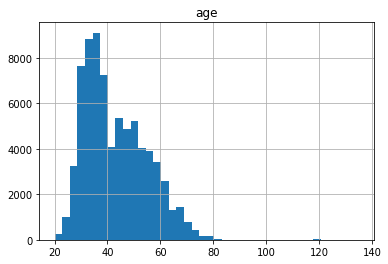

In [0]:
def age_calculator(date):
  return datetime.now().year-date

df['age']=df["birth year"].apply(age_calculator)
df.hist(column='age', bins=40)


After observing the histogram, I realise three block of ages indicated by grids: 20-40, 40-60 and 60+, they seem seperated(there is a decrese right after 40). However, labeling 20-40 as young does not make any sense because we do not say young to 36 years old.Hence I create my age categories as following;
Between 20-35,young; between 35-55, middle age and for people who are older than 55, old. I did not create a category for the people younger than 20 because in the histogram I can see that there is no such user in my data. Hence there is no need to create such category. Also, we see that there are users with age 120, outliers. The question does not ask for elimination of outliers hence I don't delete this 120 from dataframe, but eliminating it will make more sense because 120 is too old, it is not logical.


#### Age Groups


In order to categorize bike users in terms of their ages, create a function for age categorization called `age_categorize` by referring to the categories and their corresponding age intervals that you explained and justified above. Then, **apply** this function to create a new column in the dataframe called `age_category`.

In [0]:
def age_categorizer(x):
  if x>= 20 and x<=35:
    return "young"
  elif x>35 and x<=55:
    return"middle-age"
  elif x>55:
    return "old"

#alternative version to eliminate outliers
#def age_categorizer(x):
#  if x>= 20 and x<=35:
#   return "young"
#  elif x>35 and x<=55:
#   return"middle-age"
#  elif x>55 and x<<85:
#   return "old"
#this way, ages that are greater than 85 will become NA

#df["age_category"]=df["age"].apply(age_categorizer)
#df.dropna() hence, we get rid of outliers


df["age_category"]=df["age"].apply(age_categorizer)

df

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,distance,age,age_category
0,2016-05-31 19:58:48,2016-05-31 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1,661.170475,30.0,young
2,2016-05-09 07:31:19,2016-05-09 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1,1363.643700,35.0,young
3,2016-04-17 18:08:30,2016-04-17 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1,467.611897,31.0,young
4,2016-05-24 21:10:12,2016-05-24 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1,1164.656761,56.0,old
5,2016-01-19 21:44:44,2016-01-19 22:00:24,490,8 Ave & W 33 St,40.751551,-73.993934,492,W 33 St & 7 Ave,40.750200,-73.990931,22684,Subscriber,1978.0,1,294.673953,42.0,middle-age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84373,2016-03-17 18:10:01,2016-03-17 18:21:10,462,W 22 St & 10 Ave,40.746920,-74.004519,238,Bank St & Washington St,40.736197,-74.008592,23643,Subscriber,1981.0,1,1239.468345,39.0,middle-age
84374,2016-01-08 12:46:03,2016-01-08 12:48:42,174,E 25 St & 1 Ave,40.738177,-73.977387,536,1 Ave & E 30 St,40.741444,-73.975361,22949,Subscriber,1981.0,1,401.160486,39.0,middle-age
84375,2016-05-02 16:08:22,2016-05-02 16:19:43,293,Lafayette St & E 8 St,40.730287,-73.990765,470,W 20 St & 8 Ave,40.743453,-74.000040,16251,Subscriber,1987.0,1,1658.837651,33.0,young
84376,2016-01-06 17:02:06,2016-01-06 17:08:07,435,W 21 St & 6 Ave,40.741740,-73.994156,492,W 33 St & 7 Ave,40.750200,-73.990931,17342,Subscriber,1967.0,1,978.182756,53.0,middle-age


## Extracting Insights

#### Distance Distributions

With a histogram, plot the distribution of the `distance` column that you added to the dataframe in the earlier steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7af5db5828>]],
      dtype=object)

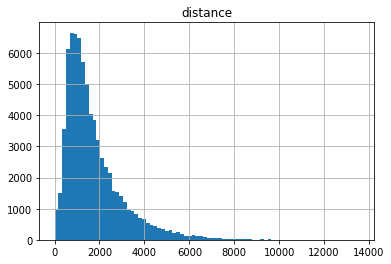

In [0]:
df.hist(column='distance', bins=80 )

#### Observation Regarding Distances

Does something seem odd? Some of the distances between start and end points seem to be 0. This should be the cases where people leaving the bikes to the same station where they rent them. 

To make sure, 
1. Please find those cases by showing the total counts of rows where the starting and ending stations are same.
2. Plot those cases against rentals do not start and end in same stations in a bar chart.

*(You can also utilize the id of these bike rental stations.)*

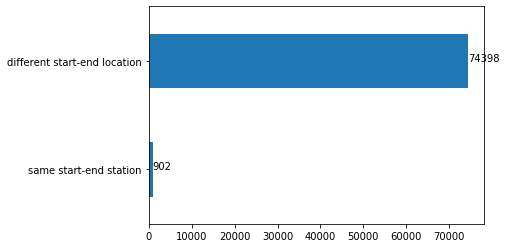

In [0]:

count_diff=0
count_same=0
c=df.shape[0]

for i in df.index:
  if df['start station name'][i]==df['end station name'][i]:
    count_same+=1
  else:
    count_diff+=1
count_same, count_diff

data = pd.Series({'same start-end station': count_same, 'different start-end location': count_diff})


ax=data.plot(kind="barh", use_index=True)
it=iter(range(len(data)))
data.apply(lambda x: ax.text(x, next(it), x));




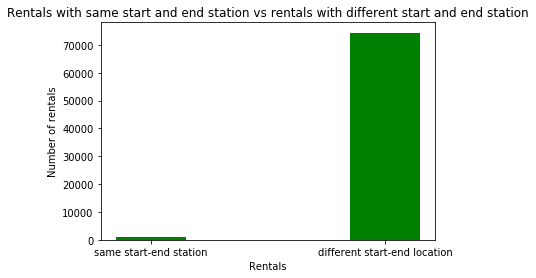

total counts of rows where the starting and ending stations are same 902
total counts of rows where the starting and ending stations are different 74398


In [0]:
#alternatively

count_diff=0
count_same=0
c=df.shape[0]

for i in df.index:
  if df['start station name'][i]==df['end station name'][i]:
    count_same+=1
  else:
    count_diff+=1
count_same, count_diff

data = {'same start-end station': count_same, 'different start-end location': count_diff}
names = list(data.keys())
values = list(data.values())
plt.bar(names, values, color='green',width=0.3)
plt.xlabel("Rentals")
plt.ylabel("Number of rentals")
plt.title("Rentals with same start and end station vs rentals with different start and end station")
plt.show()
print("total counts of rows where the starting and ending stations are same " + str(count_same))
print("total counts of rows where the starting and ending stations are different " + str(count_diff))

#### Rentals in Weekdays vs. Weekends

Since we have the date information for the bike rentals, by utilizing the functionality of the `datetime` library we can obtain the day information from the `starttime` and `stoptime`.

Now, your tasks are following:
  
  - Extract the day of week (Monday, Tuesday, etc.) information from `starttime` column and create a new column in the dataframe called `day`
  - Using this column, create a new column called `time_of_week`, which shows if the `day` value is in weekdays are in weekend days.
  - Create another column named `hour` by extracting the hour attribute from start time. 
  - Then, with these columns, show the average bike rental amounts per hour for weekdays and weekends in a 2x1 figure layout with line charts.

Please check the documentation of the [date objects](https://docs.python.org/3/library/datetime.html#datetime.date) in the datetime library from the link provided.

In [0]:

def findday(date):
    days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    dayNumber=date.weekday()
    return days[dayNumber]
df["day"]=df["starttime"].apply(findday)
df.head()

def dayfinder(d):
  if d=='Sunday' or d=='Saturday':
    return 'Weekend'
  else:
    return 'Weekday'

df["time_of_week"]=df["day"].apply(dayfinder)
df.head()

df["hour"]=df["starttime"].dt.hour
df.head()






,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,distance,age,age_category,day,time_of_week,hour
0,2016-05-31 19:58:48,2016-05-31 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1,661.170475,30.0,young,Tuesday,Weekday,19
2,2016-05-09 07:31:19,2016-05-09 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1,1363.643700,35.0,young,Monday,Weekday,7
3,2016-04-17 18:08:30,2016-04-17 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1,467.611897,31.0,young,Sunday,Weekend,18
4,2016-05-24 21:10:12,2016-05-24 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1,1164.656761,56.0,old,Tuesday,Weekday,21
5,2016-01-19 21:44:44,2016-01-19 22:00:24,490,8 Ave & W 33 St,40.751551,-73.993934,492,W 33 St & 7 Ave,40.750200,-73.990931,22684,Subscriber,1978.0,1,294.673953,42.0,middle-age,Tuesday,Weekday,21


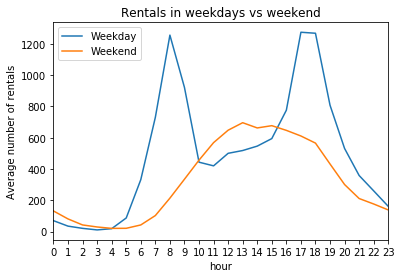

In [0]:
df_weekday=df[df["time_of_week"]=='Weekday'].groupby(['hour']).size()/5
df_weekend=df[df["time_of_week"]=='Weekend'].groupby(['hour']).size()/2
#fig, axes = plt.subplots(2,1, figsize=(12,6))
df_weekday.plot(kind='line', use_index=True, label="Weekday", xticks=df_weekday.index)
df_weekend.plot(kind='line', use_index=True, label="Weekend", xticks=df_weekend.index)
plt.title("Rentals in weekdays vs weekend")
plt.ylabel("Average number of rentals")
plt.legend()


#### Age Distributions by Gender

In our original data, gender information was mapped as follows:

    - 0: unknown
    - 1: male
    - 2: female

Use this information to display the age distributions of male and female bike users in different graphs. To do that, please use **matplotlib**'s `subplots` option to create 2 graphs located in the same row.

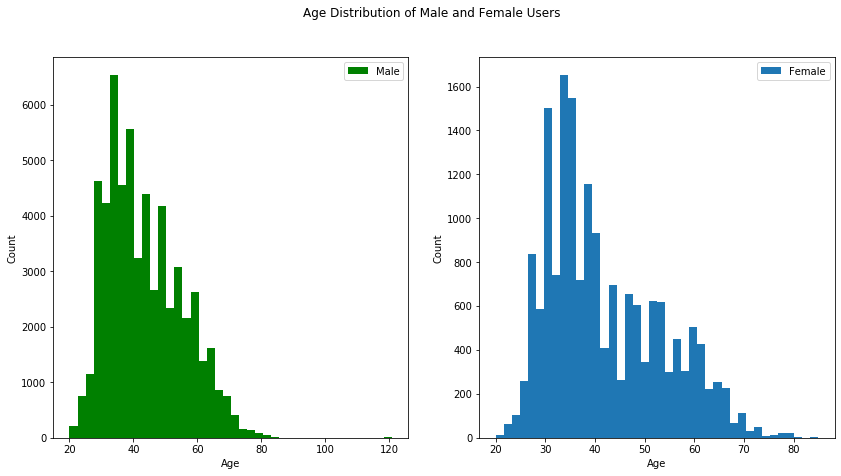

In [0]:
fig, axes = plt.subplots(1,2, figsize=(14,7))

df[df["gender"] == 1]["age"].plot.hist(ax=axes[0], bins= 40, color="green",label="Male")
df[df["gender"] == 2]["age"].plot.hist(ax=axes[1], bins=40, label="Female")

axes[0].legend()
axes[1].legend()

axes[0].set_xlabel("Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")
axes[0].set_ylabel("Count")
fig.suptitle("Age Distribution of Male and Female Users")
plt.show()

#### Usage by Age Groups

Write a function that will display the usage of bike rental system by different age groups in a bar chart *for a given time interval*. For this taks, the first step is provided for you, please complete the implementation of the function named `age_groups_in_time_intervals`. The function will take two datetime parameters for `starttime` values and will show age group ratios in pie chart.

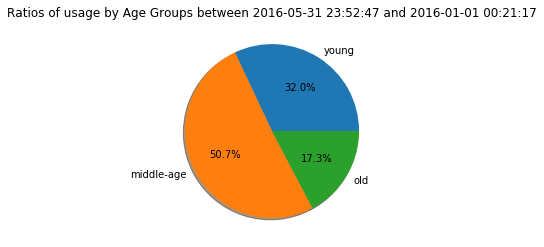

In [0]:

def age_groups_in_time_intervals(time1, time2):
  
  count_middle_age=0
  count_old=0
  countyoung=0
  total=0
  if time1<time2:
    for k in df.index:
      if df['age_category'][k]=='young'and df['starttime'][k]>=time1 and df['starttime'][k]<=time2:
        countyoung+=1
      elif df['age_category'][k]=='middle-age'and df['starttime'][k]>=time1 and df['starttime'][k]<=time2:
        count_middle_age+=1
      elif df['age_category'][k]=='old'and df['starttime'][k]>=time1 and df['starttime'][k]<=time2:
        count_old+=1
  else:
    for k in df.index:
      if df['age_category'][k]=='young'and df['starttime'][k]<=time1 and df['starttime'][k]>=time2:
        countyoung+=1
      elif df['age_category'][k]=='middle-age'and df['starttime'][k]<=time1 and df['starttime'][k]>=time2:
        count_middle_age+=1
      elif df['age_category'][k]=='old'and df['starttime'][k]<=time1 and df['starttime'][k]>=time2:
        count_old+=1
  total=(countyoung)+(count_middle_age)+ (count_old)

  labels = ['young', 'middle-age', 'old']
  sizes = [(countyoung/total)*100, (count_middle_age/total)*100, (count_old/total)*100]

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
 
  
  plt.title('Ratios of usage by Age Groups between ' + str(time1)  + ' and ' + str(time2))
  
age_groups_in_time_intervals(df['starttime'][73836],df['starttime'][52356])



#### Age Groups vs Distance 

Similar to the task above, we can also investigate the variance of distance between age groups. Plot histograms of distances in each age group in a juxtaposed 1x3 layout.

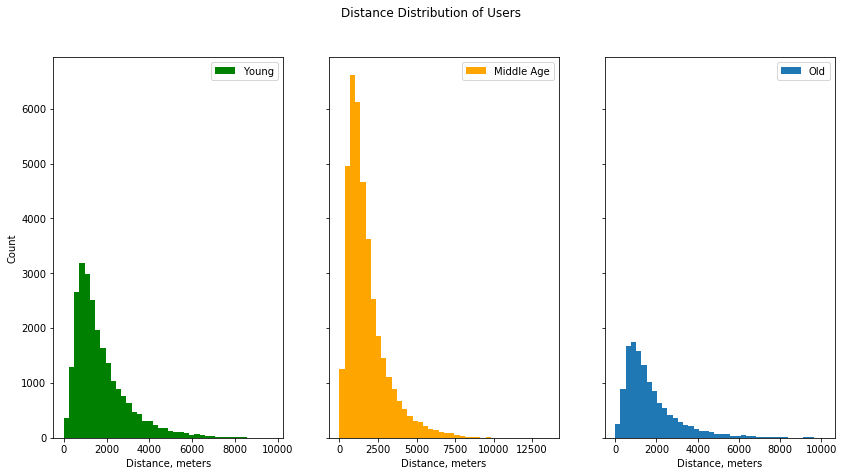

In [0]:
fig, axes = plt.subplots(1,3, figsize=(14,7), sharey=True)

df[df["age_category"] == 'young']["distance"].plot.hist(ax=axes[0], bins= 40, color="green",label="Young")
df[df["age_category"] == 'middle-age']["distance"].plot.hist(ax=axes[1], bins= 40, color="orange",label="Middle Age")
df[df["age_category"] == 'old']["distance"].plot.hist(ax=axes[2], bins= 40,label="Old")

axes[0].legend()
axes[1].legend()
axes[2].legend()

axes[0].set_xlabel("Distance, meters")
axes[0].set_ylabel("Count")
axes[1].set_xlabel("Distance, meters")

axes[2].set_xlabel("Distance, meters")

fig.suptitle("Distance Distribution of Users")
plt.show()

## Spatial Visualizations

In this section, you are going to utilize the latitude and longitude values associated with bike rentals and visualize them on a real-world map. 

#### Bike Stations in NYC

From all locations (latitude, longitude pairs) in start and end stations, extract the unique ones and display them as circle markers on the map.

In [0]:
import folium
locations=[]
for i in df.index:
    a=df['start station latitude'][i]
    b=df['start station longitude'][i]
    locations.append((a,b))
for j in df.index:
    c=df['end station latitude'][j]
    d=df['end station longitude'][j]
    locations.append((c,d))
res = [] 
for i in locations: 
    if i not in res: 
        res.append(i)
map = folium.Map(location=res[0])
for point in range(1, len(res)):
    folium.CircleMarker(res[point], radius=5, popup=None, color="purple").add_to(map)
map

      



#### Heatmap of Rentals

Extract the latitude and longitude values of rental start locations and display their heatmap. 

In order to generate a heatmap, you may use the link below.

https://python-visualization.github.io/folium/plugins.html#folium.plugins.HeatMap

In [0]:
from folium.plugins import HeatMap
start_locations=[]
for i in df.index:
    a=df['start station latitude'][i]
    b=df['start station longitude'][i]
    start_locations.append((a,b))
res2 = [] 
for i in start_locations: 
    if i not in res2: 
        res2.append(i)

m = folium.Map(location=res2[0],zoom_start=6, tiles="Stamen Terrain")

HeatMap(res2).add_to(m)


m
